### Dataset Loading

In [1]:
import os
import shutil
import pandas as pd

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from PIL import Image

In [2]:
responses_path = r"correlation_assignment\responses.csv"

df = pd.read_csv(responses_path)    

df["id"] = df["id"].astype(str) + ".png"

df[:5]

,id,corr
0,arjskzyc.png,-0.457810
1,jrsnrkcp.png,-0.523113
2,hycqmekg.png,-0.179033
3,cerpyxxj.png,0.251509
4,cohtzuog.png,0.353992


In [3]:
img_directory = r"correlation_assignment\images"

In [4]:
image = Image.open(os.path.join(img_directory, df['id'][0]))

print(image.size)

(150, 150)


In [10]:
train_num = int(len(df) * 0.6) 
val_num = int(len(df) * 0.2) 

train_df = df[:train_num]
val_df = df[train_num: train_num + val_num]
test_df = df[train_num + val_num:]

print(len(train_df), len(val_df), len(test_df))

90000 30000 30000


In [33]:
data_generator = ImageDataGenerator(rescale=1./255)

train_generator = data_generator.flow_from_dataframe(
    dataframe=train_df,
    directory=img_directory,  
    x_col="id",
    y_col="corr",
    target_size=(150, 150),
    batch_size=32,
    class_mode="raw",
    color_mode="grayscale"
)

val_generator = data_generator.flow_from_dataframe(
    dataframe=val_df,
    directory=img_directory,
    x_col="id",
    y_col="corr",
    target_size=(150, 150),
    batch_size=32,
    class_mode="raw",
    color_mode="grayscale"
)

test_generator = data_generator.flow_from_dataframe(
    dataframe=test_df,
    directory=img_directory,
    x_col="id",
    y_col="corr",
    target_size=(150, 150),
    batch_size=32,
    class_mode="raw",
    color_mode="grayscale",
    shuffle=False
)

Found 90000 validated image filenames.
Found 30000 validated image filenames.
Found 30000 validated image filenames.


### Model Setup

In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models

import matplotlib.pyplot as plt

In [18]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse', 'mae'])

model.summary()


c:\Users\USER\Desktop\Code\Python\PicCollage\PicCollage_Assignment1\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 148, 148, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 34, 34, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 73984)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │     4,735,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,790,849 (18.28 MB)

 Trainable params: 4,790,849 (18.28 MB)

 Non-trainable params: 0 (0.00 B)

### Model Training

In [19]:
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=val_generator
)

Epoch 1/5
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step - loss: 0.8697 - mae: 0.1298 - mse: 0.8697

c:\Users\USER\Desktop\Code\Python\PicCollage\PicCollage_Assignment1\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2813/2813 ━━━━━━━━━━━━━━━━━━━━ 746s 265ms/step - loss: 0.8695 - mae: 0.1298 - mse: 0.8695 - val_loss: 0.0025 - val_mae: 0.0392 - val_mse: 0.0025
Epoch 2/5
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 729s 259ms/step - loss: 0.0018 - mae: 0.0326 - mse: 0.0018 - val_loss: 0.0015 - val_mae: 0.0299 - val_mse: 0.0015
Epoch 3/5
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 766s 272ms/step - loss: 0.0014 - mae: 0.0293 - mse: 0.0014 - val_loss: 0.0010 - val_mae: 0.0254 - val_mse: 0.0010
Epoch 4/5
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 740s 263ms/step - loss: 0.0010 - mae: 0.0249 - mse: 0.0010 - val_loss: 0.0011 - val_mae: 0.0255 - val_mse: 0.0011
Epoch 5/5
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 748s 266ms/step - loss: 9.0966e-04 - mae: 0.0234 - mse: 9.0966e-04 - val_loss: 8.8957e-04 - val_mae: 0.0231 - val_mse: 8.8957e-04


In [20]:
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mae']
val_mae = history.history['val_mae']
mse = history.history['mse']
val_mse = history.history['val_mse']
epochs = range(1, 5 + 1)

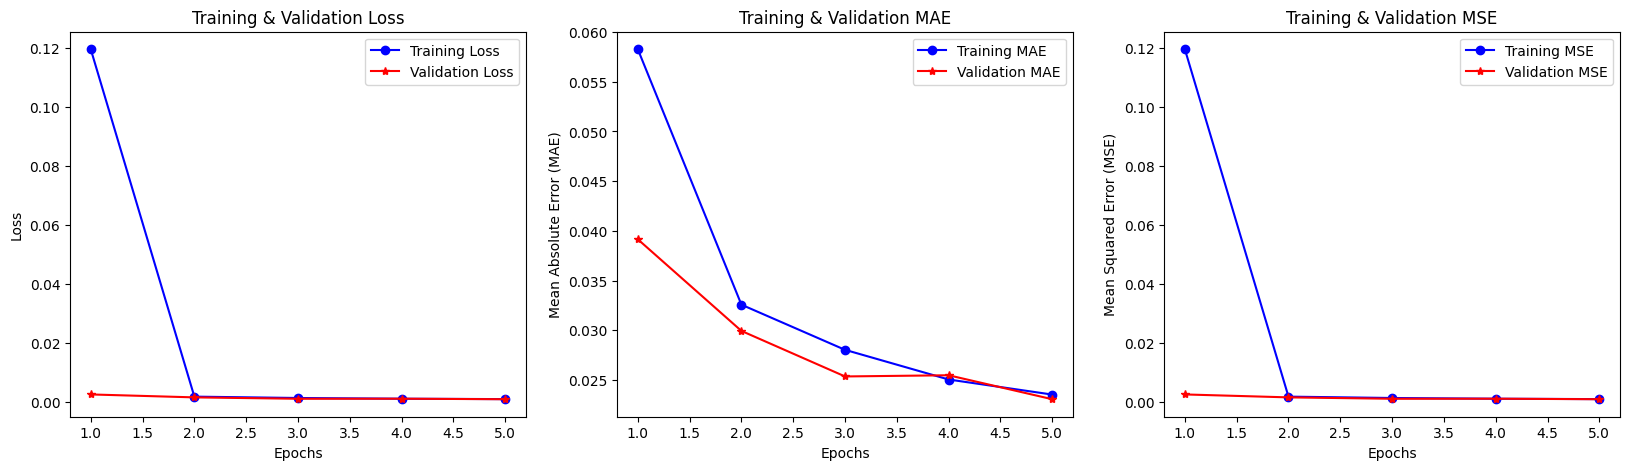

In [29]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'r*-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(epochs, mae, 'bo-', label='Training MAE')
plt.plot(epochs, val_mae, 'r*-', label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Training & Validation MAE')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(epochs, mse, 'bo-', label='Training MSE')
plt.plot(epochs, val_mse, 'r*-', label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training & Validation MSE')
plt.legend()

In [34]:
predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)

  1/938 ━━━━━━━━━━━━━━━━━━━━ 1:27 93ms/step

c:\Users\USER\Desktop\Code\Python\PicCollage\PicCollage_Assignment1\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


938/938 ━━━━━━━━━━━━━━━━━━━━ 49s 52ms/step


In [32]:
test_df

,id,corr
120000,hculdkjo.png,-0.056347
120001,staryzqq.png,-0.053348
120002,ncdwnpof.png,-0.567369
120003,kqwnedft.png,-0.340399
120004,ffwbbhfx.png,-0.837544
...,...,...
149995,ehssnlad.png,0.076382
149996,popttjwz.png,-0.414356
149997,srujwxih.png,-0.326492
149998,onpaijpq.png,-0.017322


In [49]:
results_df = test_df.copy()

In [52]:
results_df['pred'] = predictions

In [53]:
results_df

,id,corr,pred
120000,hculdkjo.png,-0.056347,-0.064229
120001,staryzqq.png,-0.053348,-0.043083
120002,ncdwnpof.png,-0.567369,-0.576794
120003,kqwnedft.png,-0.340399,-0.316971
120004,ffwbbhfx.png,-0.837544,-0.797773
...,...,...,...
149995,ehssnlad.png,0.076382,0.091294
149996,popttjwz.png,-0.414356,-0.406400
149997,srujwxih.png,-0.326492,-0.327437
149998,onpaijpq.png,-0.017322,-0.039275


In [54]:
results_df.to_csv('test_results.csv')